In [ ]:
!pip install scipy==1.11.4
!pip install dalex
!pip install scikit-plot
!pip install shap
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 14.5 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dalex: filename=dalex-1.7.1-py3-none-any.whl size=1042797 sha256=de6de6cdcfa8f15c122a4cb385de1148bd967d9343ba4e97c271ee859ba5ad40
  Stored in directory: /root/.cache/pip/wheels/fe/c2/41/63e006b3312a4e17299bed5f83d985dea872368f9ab16bb20f
Successfully built dalex
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=0bff8151df62befff36f465a9abb3b2bdaa0ab18f7ccd0be59dc894ba649b8b5
  Stored in direc

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from xgboost import XGBClassifier

import dalex as dx

import scikitplot as skplt

# load shap package for shap explanation
import shap

# load LimeTabularExplainer for LIME method
from lime.lime_tabular import LimeTabularExplainer

In [ ]:
df = pd.read_csv('https://bit.ly/adv_bi_bank_cust_churn')
df.head()

,user_id,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   10127 non-null  int64  
 1   attrition_flag            10127 non-null  object 
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  object 
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  object 
 6   marital_status            10127 non-null  object 
 7   income_category           10127 non-null  object 
 8   card_category             10127 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

In [ ]:
df.isnull().sum()

,0
user_id,0
attrition_flag,0
customer_age,0
gender,0
dependent_count,0
education_level,0
marital_status,0
income_category,0
card_category,0
months_on_book,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['attrition_flag'] = df['attrition_flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

In [ ]:
df.tail()

,user_id,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
10122,772366833,0,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,1,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,1,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,1,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,714337233,1,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


## Split Data

In [ ]:
X = df.drop(columns=['attrition_flag'])
y = df['attrition_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

train_data = X_train.copy()
train_data['attrition_flag'] = y_train

print(f'Training size: {X_train.shape}, Testing size: {X_test.shape}')

Training size: (8101, 20), Testing size: (2026, 20)


## Analisa Pertanyaan

### 1. Distribusi Usia Customer

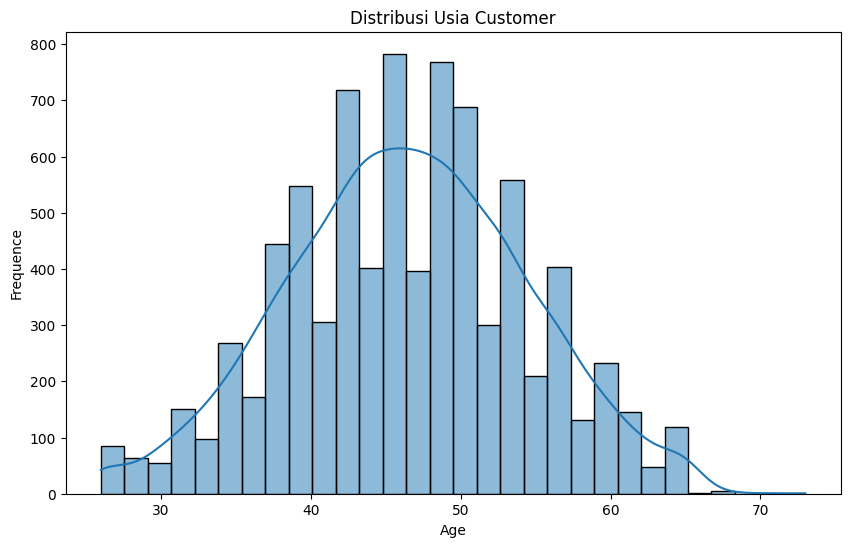

<ipython-input-17-9a9d53437a8b>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_age = train_data.groupby('Age_Group')['attrition_flag'].mean()


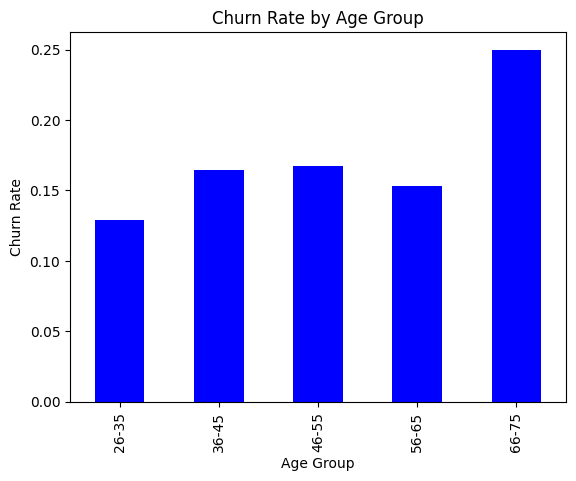

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(train_data['customer_age'], bins=30, kde=True)
plt.title('Distribusi Usia Customer')
plt.xlabel('Age')
plt.ylabel('Frequence')
plt.show()

#churn berdasarkan usia
train_data['Age_Group'] = pd.cut(train_data['customer_age'], bins=[26, 35, 45, 55, 65, 75], labels=['26-35','36-45','46-55','56-65','66-75'])
churn_age = train_data.groupby('Age_Group')['attrition_flag'].mean()
churn_age.plot(kind='bar', color='blue')
plt.title('Churn Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Churn Rate')
plt.show()

- Customer usia 40-50 paling banyak menggunakan platform dari bank.
- Berdasarkan grafik kedua, kelompok usia 66-75 paling tinggi grafiknya yang manandakan customer usia tersebut memiliki kemungkinan besar untuk melakukan churn.

### 2. Korelasi Tingkat Pendidikan dan Income Category

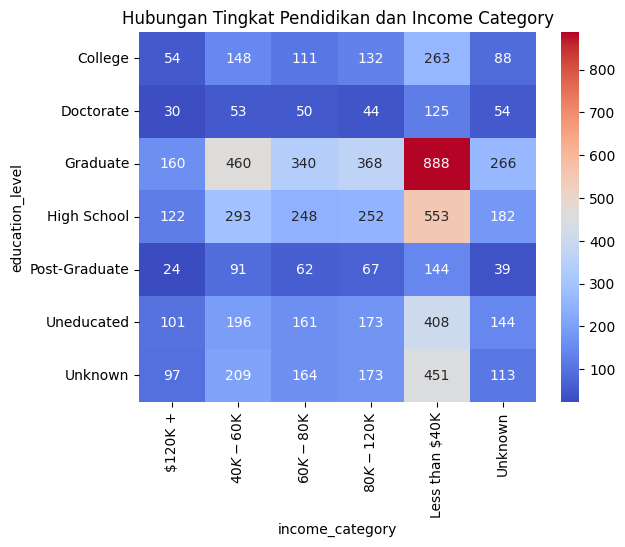

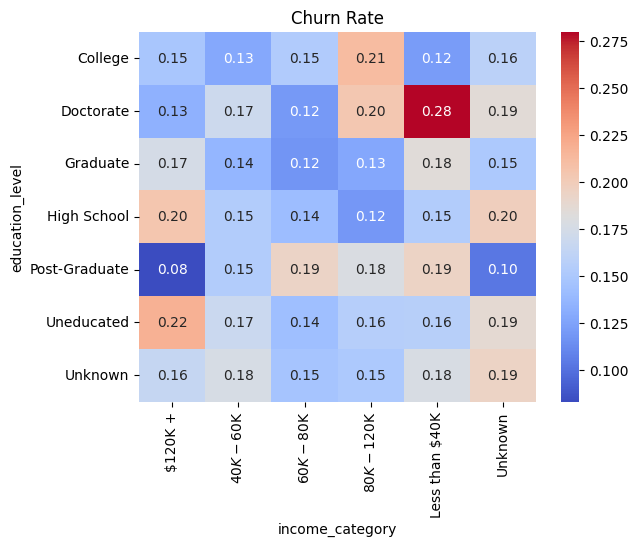

In [ ]:
edu_inc_corr = pd.crosstab(train_data['education_level'], train_data['income_category'])
sns.heatmap(edu_inc_corr, annot=True, fmt='d', cmap='coolwarm')
plt.title('Hubungan Tingkat Pendidikan dan Income Category')
plt.show()

#korelasi terhadap churn
churn_edu_inc = train_data.groupby(['education_level','income_category'])['attrition_flag'].mean().unstack()
sns.heatmap(churn_edu_inc, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Churn Rate')
plt.show()

- Terdapat korelasi antara tingkat pendidikan dengan income category. Graduate dan pendapatan kurang dari $40K memiliki hubungan yang paling tinggi, ini menunjukkan kelompok tersebut bisa menjadi potensi customer setia karena jumlah yang tinggi. Bank dapat menyusun strategi yang efektif untuk mempertahankan customer.

- Customer dengan tingkat pendidikan doctorate dan kategori pendapatan kurang dari $40K memiliki tingkat churn yang tinggi. Bank mungkin harus menawarkan produk yang sesuai dan menarik untuk pelanggan dengan berpendapatan rendah tetapi dengan tingkat pendidikan yang tinggi. Untuk variabel yang lain korelasi terhadap churn masih terbilang rendah.

### 3. Perbedaan Gender untuk Churn

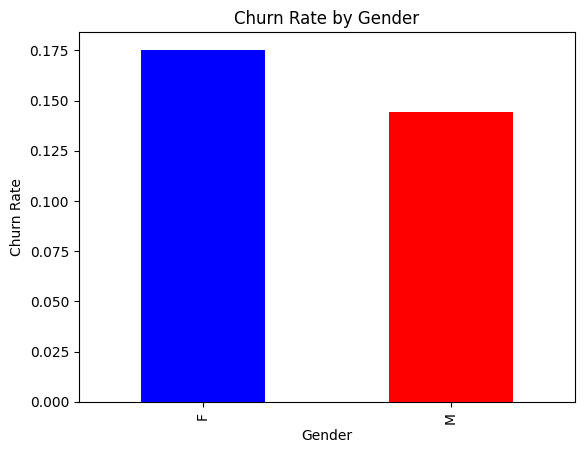

In [ ]:
churn_gender = train_data.groupby('gender')['attrition_flag'].mean()
churn_gender.plot(kind='bar', color=['blue','red'])
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.show()

In [ ]:
from scipy.stats import chi2_contingency
gender_churn = pd.crosstab(train_data['gender'], train_data['attrition_flag'])
chi2, p, dof, expected = chi2_contingency(gender_churn)
print(f'P-value: {p}')

P-value: 0.00017632820436671044


Pada plot dihasilkan bahwa Female customer lebih banyak churn daripada Male customer. Untuk statistik, P-value yang kecil kurang dari 0.05 menunjukkan adanya hubungan signifikan antara gender dan churn. Proporsi customer yang mengalami churn berbeda antara female dan male.

### 4. Loyalitas Customer

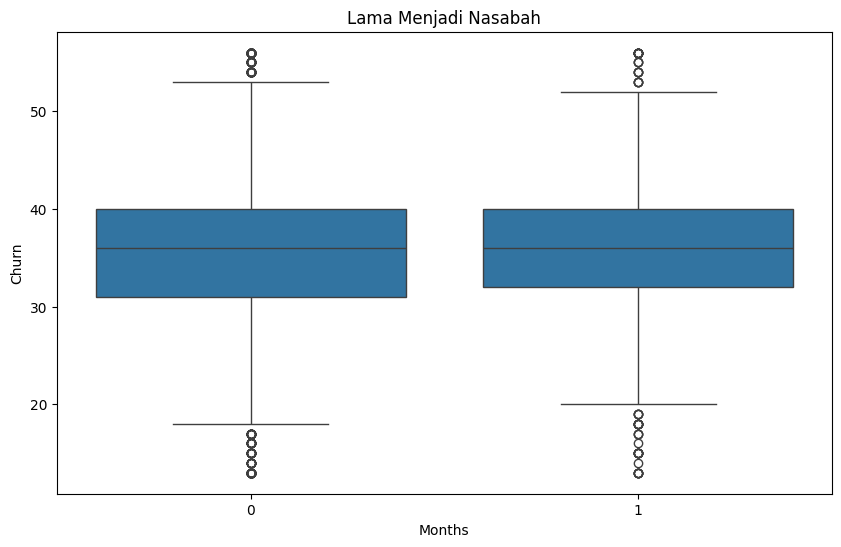

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=train_data['attrition_flag'], y=train_data['months_on_book'])
plt.title('Lama Menjadi Nasabah')
plt.xlabel('Months')
plt.ylabel('Churn')
plt.show()

Berdasarkan boxplot di atas, tidak ada perbedaan yang signifikan tentang durasi customer untuk churn. Artinya, nasabah baru maupun lama memiliki kemungkinan untuk melakukan churn.

### 5. Interaksi Customer

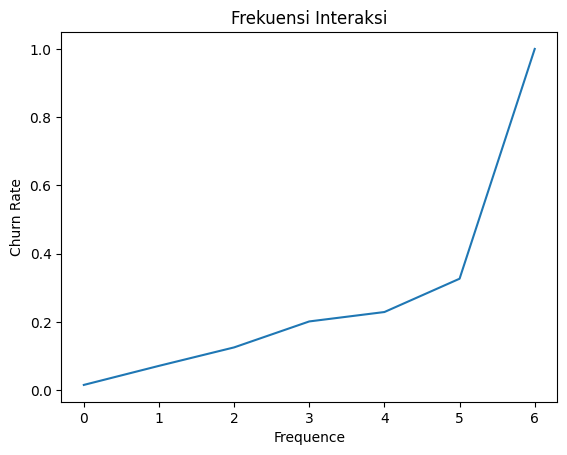

In [ ]:
interaction = train_data.groupby('contacts_count_12_mon')['attrition_flag'].mean()
interaction.plot(kind='line')
plt.title('Frekuensi Interaksi')
plt.xlabel('Frequence')
plt.ylabel('Churn Rate')
plt.show()

Interaksi customer dengan bank dalam 1 tahun terakhir menunjukkan bahwa semakin sering berinteraksi, maka semakin besar kemungkinan nasabah untuk churn yang ditandai dengan semakin meningkatnya grafik.

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

#identifikasi kolom numerik dan kategorical

numerical = X_train.select_dtypes(include=['integer','float']).columns
categorical = X_train.select_dtypes(include=['object']).columns

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical),
        ('cat', categorical_transformer, categorical)
    ])

## Modeling

### Random Forest

In [ ]:
model_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])
model_rf.fit(X_train, y_train)
rf_y_pred = model_rf.predict(X_test)
rf_y_proba = model_rf.predict_proba(X_test)[:,1]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1701
           1       0.95      0.77      0.85       325

    accuracy                           0.96      2026
   macro avg       0.95      0.88      0.91      2026
weighted avg       0.96      0.96      0.96      2026



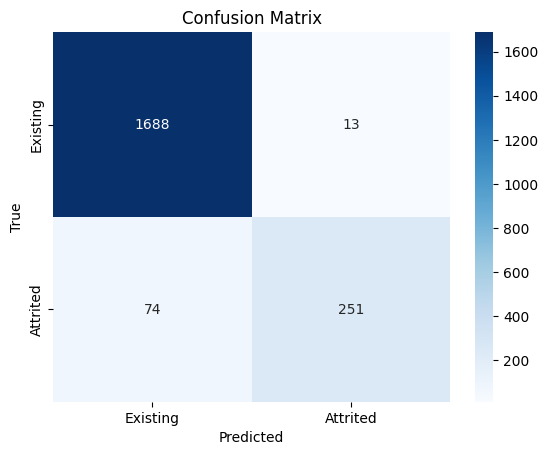

In [ ]:
print('Classification Report:')
print(classification_report(y_test, rf_y_pred))
cmatrix = confusion_matrix(y_test, rf_y_pred)
sns.heatmap(cmatrix, annot=True, fmt='d', cmap='Blues',xticklabels=['Existing','Attrited'], yticklabels=['Existing','Attrited'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

1. Pada classification report, precision 1 (churn) sebesar 95% artinya model benar dalam memprediksi customer yang churn. Recall sebesar 77%, model berhasil mengidentifikasi 77% dari total customer yang benar melakukan churn. F1-score sebesar 85% artinya model memiliki performa yang baik.

2. Diketahui confusion matrix TP = 251, TN = 1688, FP = 13, FN = 74.
- TP sebesar 251 artinya model memprediksi bahwa yang akan churn sebanyak 251 customer.
- FP sebesar 13, dimana model salah memprediksi yang harusnya tidak churn menjadi churn.
- FN sebesar 74 berarti model salah memprediksi dan akan merugikan bank karena seharusnya customer churn tetapi prediksi model tidak churn.

### XGBoost

In [ ]:
model_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42))
])
model_xgb.fit(X_train, y_train)
xgb_y_pred = model_xgb.predict(X_test)
xgb_y_proba = model_xgb.predict_proba(X_test)[:,1]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1701
           1       0.92      0.85      0.89       325

    accuracy                           0.96      2026
   macro avg       0.95      0.92      0.93      2026
weighted avg       0.96      0.96      0.96      2026



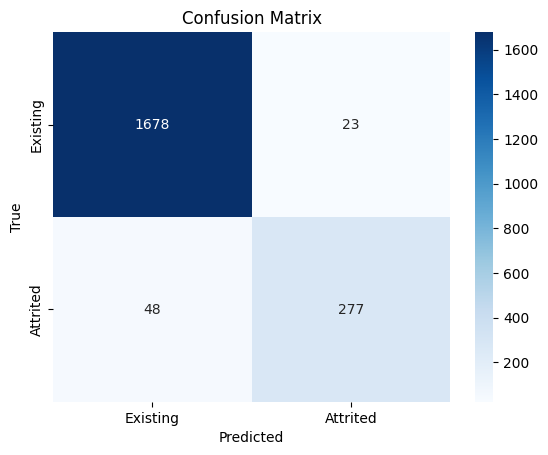

In [ ]:
print('Classification Report:')
print(classification_report(y_test, xgb_y_pred))
cmatrix = confusion_matrix(y_test, xgb_y_pred)
sns.heatmap(cmatrix, annot=True, fmt='d', cmap='Blues',xticklabels=['Existing','Attrited'], yticklabels=['Existing','Attrited'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

1. Dari hasil classification report, precision 1 (churn) sebesar 92%, artinya 92% benar melakukan churn. Recall 85% lebih baik dari model Random Forest, model ini berhasil mendeteksi customer churn sebesar 85%. F1-score sebesar 89% artinya model memiliki performa yang baik.

2. Hasil confusion matrix, TP = 277, FP = 23, FN = 48, TN = 1678. Dalam hal ini, model XGBoost lebih unggul daripada Random Forest, ditandai dengan lebih baik dalam mendeteksi customer yang churn dan mendeteksi customer yang benar-benar melakukan churn.

Dari kedua model tersebut, model terbaik yaitu XGBoost karena unggul dalam mendeteksi customer churn.

## Feature Importance

In [ ]:
churn_rf_exp = dx.Explainer(model_rf, X_train, y_train, label = 'RF Interpretation')
churn_xgb_exp = dx.Explainer(model_xgb, X_train, y_train, label = 'XGB Interpretation')

Preparation of a new explainer is initiated

  -> data              : 8101 rows 20 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 8101 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : RF Interpretation
  -> predict function  : <function yhat_proba_default at 0x7b9026ae96c0> will be used (default)
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 0.0, mean = 0.16, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.45, mean = 0.000359, max = 0.43
  -> model_info        : package sklearn

A new explainer has been created!
Preparation of a new explainer is initiated

  -> data              : 8101 rows 20 cols
  -> target variable   : Parameter 'y' was a pandas.Series.

### Permutation Feature Importance

In [ ]:
churn_rf_exp.model_parts().plot()

In [ ]:
churn_xgb_exp.model_parts().plot()

Dari kedua model, variabel terpenting untuk menentukan kemungkinan churn yaitu total_trans_ct (the number of transaction in the last 12 months). Customer dengan jumlah transaksi yang lebih rendah dalam setahun terakhir kemungkinan akan mengalami churn. Keterlibatan customer diukur melalui aktivitas transaksi yang menjadi indikator utama customer kemungkinan churn.

Customer dengan jumlah transaksi yang rendah dapat menjadi target utama bank dalam menyusun strategi. Contohnya, melakukan promosi yang masif seperti menawarkan keuntungan dalam melakukan transaksi digital. Bank juga dapat menawarkan produk yang relevan dengan keadaan customer.

### Partial Dependece Plot

In [ ]:
churn_rf_exp.model_profile().plot()

Calculating ceteris paribus:   5%|▌         | 1/20 [00:00<00:06,  2.96it/s]/usr/local/lib/python3.10/dist-packages/dalex/predict_explanations/_ceteris_paribus/utils.py:100: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[26.   26.47 26.94 ... 72.06 72.53 73.  ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

Calculating ceteris paribus:  10%|█         | 2/20 [00:00<00:06,  2.90it/s]/usr/local/lib/python3.10/dist-packages/dalex/predict_explanations/_ceteris_paribus/utils.py:100: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.   0.05 0.1  ... 4.9  4.95 5.  ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

Calculating ceteris paribus:  30%|███       | 6/20 [00:01<00:02,  5.82it/s]/usr/local/lib/python3.10/dist-packages/dalex/predict_explanations/_ceteris_paribus/u

Pada awal grafik probabilitas churn sebesar 0.4 dimana customer yang melakukan transaksi rendah dalam satu tahun terakhir cenderung berisiko untuk churn. Grafik menurun di rentang 40-80 menunjukkan transaksi yang tinggi dan seringnya keterlibatan dengan bank membuat risiko churn customer menjadi lebih rendah.

Pelanggan dengan jumlah transaksi lebih rendah harus menjadi prioritas bank untuk meningkatkan aktivitas customer dengan memberikan penawaran khusus dan melakukan promosi. Jadi, semakin rendah jumlah transaksi, semakin tinggi risiko customer untuk churn.

In [ ]:
churn_xgb_exp.model_profile().plot()

Calculating ceteris paribus:   5%|▌         | 1/20 [00:00<00:03,  5.08it/s]/usr/local/lib/python3.10/dist-packages/dalex/predict_explanations/_ceteris_paribus/utils.py:100: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[26.   26.47 26.94 ... 72.06 72.53 73.  ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

Calculating ceteris paribus:  10%|█         | 2/20 [00:00<00:03,  4.63it/s]/usr/local/lib/python3.10/dist-packages/dalex/predict_explanations/_ceteris_paribus/utils.py:100: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.   0.05 0.1  ... 4.9  4.95 5.  ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

Calculating ceteris paribus:  35%|███▌      | 7/20 [00:00<00:01, 10.35it/s]/usr/local/lib/python3.10/dist-packages/dalex/predict_explanations/_ceteris_paribus/u

Di awal grafik probabilitas mendekati 0.5 menunjukkan customer dengan transaksi rendah berisiko untuk churn. Tren grafik ini hampir sama dengan tren Random Forest yang menurun tajam, yang artinya customer dengan aktivitas transaksi yang tinggi berisiko kecil untuk churn.

Bank dapat mendorong keterlibatan customer untuk sering melakukan aktivitas transaksi di bank untuk menghindari churn. Melakukan promosi dan memberikan insentif saat menggunakan layanan bank menjadi cara dalam mencegah customer melakukan churn.